In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=468ca81eedd7a7e8b9b10604f280ae4ffc6d505b7ac188dcef8ce3da19cd3a87
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master("local") \
        .appName("Google Drive and PySpark") \
        .getOrCreate()

In [ ]:
file_path = '/content/drive/MyDrive/nyc_tickets_violation_2020/Parking_Violations_Issued_-_Fiscal_Year_2020.csv'

df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv(file_path)


In [ ]:
df.show(10)

+--------------+--------+------------------+----------+--------------------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-------------------+-------------------+-------------------+-----------+------------+--------------------+----------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+
|Summons Number|Plate ID|Registration State|Plate Type|          Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Iss

In [ ]:
num_rows = df.count()
print("Number of rows: ", num_rows)


Number of rows:  12495734


In [ ]:
from pyspark.sql.types import StringType

In [ ]:
# get the data types of all columns
dtypes = df.dtypes


print(dtypes)

[('Summons Number', 'bigint'), ('Plate ID', 'string'), ('Registration State', 'string'), ('Plate Type', 'string'), ('Issue Date', 'string'), ('Violation Code', 'int'), ('Vehicle Body Type', 'string'), ('Vehicle Make', 'string'), ('Issuing Agency', 'string'), ('Street Code1', 'int'), ('Street Code2', 'int'), ('Street Code3', 'int'), ('Vehicle Expiration Date', 'int'), ('Violation Location', 'int'), ('Violation Precinct', 'int'), ('Issuer Precinct', 'int'), ('Issuer Code', 'int'), ('Issuer Command', 'string'), ('Issuer Squad', 'string'), ('Violation Time', 'string'), ('Time First Observed', 'string'), ('Violation County', 'string'), ('Violation In Front Of Or Opposite', 'string'), ('House Number', 'string'), ('Street Name', 'string'), ('Intersecting Street', 'string'), ('Date First Observed', 'int'), ('Law Section', 'int'), ('Sub Division', 'string'), ('Violation Legal Code', 'string'), ('Days Parking In Effect', 'string'), ('From Hours In Effect', 'string'), ('To Hours In Effect', 'stri

In [ ]:
# define a list of column names
#columns_to_keep = ["Registration State", "Plate Type", "Street Code1","Street Code2","Street Code3","Violation Code","Issue Date","Vehicle Body Type","Vehicle Color","Violation Precinct","Violation Time","Violation County"]
columns_to_keep = ["Registration State", "Plate Type","Violation Code","Issue Date","Vehicle Body Type","Vehicle Color","Violation Precinct","Violation Time","Violation County"]
# select specific columns using the list and save them in a new DataFrame
new_df = df.select(*columns_to_keep)

# display the new DataFrame
new_df.show()


+------------------+----------+--------------+--------------------+-----------------+-------------+------------------+--------------+----------------+
|Registration State|Plate Type|Violation Code|          Issue Date|Vehicle Body Type|Vehicle Color|Violation Precinct|Violation Time|Violation County|
+------------------+----------+--------------+--------------------+-----------------+-------------+------------------+--------------+----------------+
|                NJ|       PAS|            16|05/08/1972 12:00:...|              SDN|           BK|                72|         0523P|               K|
|                PA|       PAS|            98|08/29/1977 12:00:...|             SUBN|          BLK|                77|         0428P|               K|
|                NJ|       PAS|            20|10/03/1988 12:00:...|              SDN|        BLACK|                88|         0625A|               K|
|                OH|       PAS|            21|01/03/1990 12:00:...|              SDN|         

In [ ]:
num_rows = new_df.count()
print("Number of rows: ", num_rows)

Number of rows:  12495734


In [ ]:
df_cleaned = new_df.na.drop()
df_cleaned.show()

+------------------+----------+--------------+--------------------+-----------------+-------------+------------------+--------------+----------------+
|Registration State|Plate Type|Violation Code|          Issue Date|Vehicle Body Type|Vehicle Color|Violation Precinct|Violation Time|Violation County|
+------------------+----------+--------------+--------------------+-----------------+-------------+------------------+--------------+----------------+
|                NJ|       PAS|            16|05/08/1972 12:00:...|              SDN|           BK|                72|         0523P|               K|
|                PA|       PAS|            98|08/29/1977 12:00:...|             SUBN|          BLK|                77|         0428P|               K|
|                NJ|       PAS|            20|10/03/1988 12:00:...|              SDN|        BLACK|                88|         0625A|               K|
|                NY|       PAS|            21|02/14/1990 12:00:...|             SUBN|         

In [ ]:
num_rows=df_cleaned.count()
print(num_rows)

12038086


In [ ]:
from pyspark.sql.functions import col

# columns_to_filter = ["Registration State", "Plate Type", "Street Code1","Street Code2","Street Code3","Issue Date","Violation Code","Vehicle Body Type","Issuing Agency","Vehicle Expiration Date","Violation Location","Violation Precinct","Issuer Precinct","Issuer Code","Issuer Command","Violation Time","Violation County"]

columns_to_filter = ["Registration State", "Plate Type","Violation Code","Issue Date","Vehicle Body Type","Vehicle Color","Violation Precinct","Violation Time","Violation County"]
for column_name in columns_to_filter:
    df = df_cleaned.filter(col(column_name) != 0)
    row_count = df.count()
    print(f"Filtered DataFrame has {row_count} rows after filtering column '{column_name}'.")


Filtered DataFrame has 18428 rows after filtering column 'Registration State'.
Filtered DataFrame has 52175 rows after filtering column 'Plate Type'.
Filtered DataFrame has 12037382 rows after filtering column 'Violation Code'.
Filtered DataFrame has 0 rows after filtering column 'Issue Date'.
Filtered DataFrame has 61 rows after filtering column 'Vehicle Body Type'.
Filtered DataFrame has 13 rows after filtering column 'Vehicle Color'.
Filtered DataFrame has 7868965 rows after filtering column 'Violation Precinct'.
Filtered DataFrame has 147 rows after filtering column 'Violation Time'.
Filtered DataFrame has 0 rows after filtering column 'Violation County'.


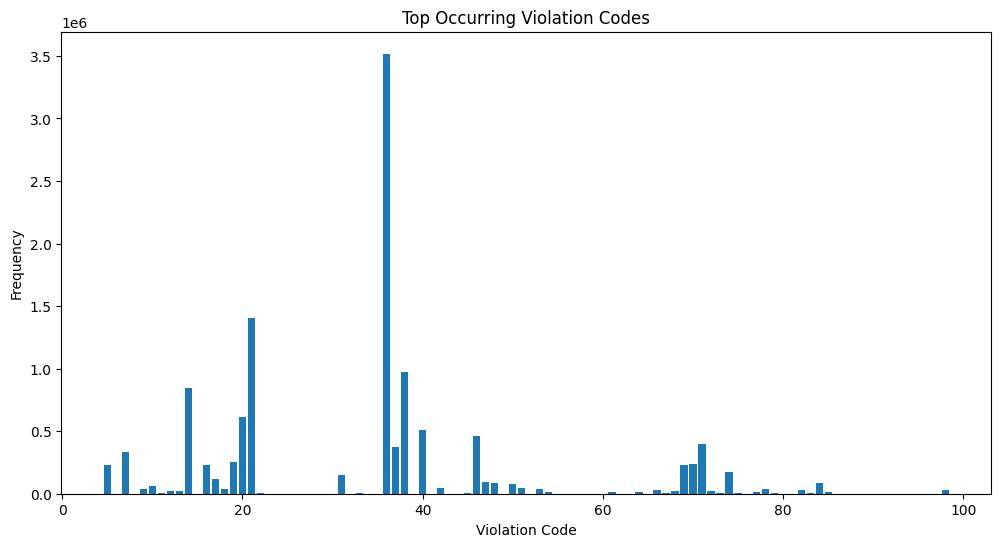

In [ ]:
from pyspark.sql.functions import col, desc
import matplotlib.pyplot as plt

# Aggregate the data by "violation code" and count occurrences
aggregated_data = df_cleaned.groupBy("Violation Code").count()

# Sort by count in descending order
sorted_data = aggregated_data.sort(desc("count"))

# (Optional) Select the top N highest occurring codes
top_n = 50
top_codes = sorted_data.limit(top_n).toPandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_codes["Violation Code"], top_codes["count"])
plt.xlabel("Violation Code")
plt.ylabel("Frequency")
plt.title("Top Occurring Violation Codes")
plt.show()


In [ ]:
from pyspark.sql.functions import col, desc

# Aggregate the data by "violation code" and count occurrences
aggregated_data = df_cleaned.groupBy("Violation Code").count()

# Calculate the total number of occurrences for all codes
total_count = aggregated_data.agg({"count": "sum"}).collect()[0][0]

# Sort by count in descending order
sorted_data = aggregated_data.sort(desc("count"))

# Find the violation codes responsible for 99% of the data
threshold = 0.99 * total_count
accumulated_count = 0
codes_responsible_99_percent = []

for row in sorted_data.collect():
    accumulated_count += row["count"]
    codes_responsible_99_percent.append(row["Violation Code"])

    if accumulated_count >= threshold:
        break

print(f"Total count of all violation codes: {total_count}")
print(f"Count of violation codes responsible for 99% of the data: {accumulated_count}")
print("Violation codes responsible for 99% of the data:", codes_responsible_99_percent)
print("Violation codes responsible for 99% of the data:", codes_responsible_99_percent)

Total count of all violation codes: 12038086
Count of violation codes responsible for 99% of the data: 11918193
Violation codes responsible for 99% of the data: [36, 21, 38, 14, 20, 40, 46, 71, 37, 7, 19, 70, 5, 16, 69, 74, 31, 17, 47, 84, 48, 50, 10, 51, 42, 9, 78, 53, 18, 66, 98, 82, 72, 13, 12, 68, 85, 77, 64]
Violation codes responsible for 99% of the data: [36, 21, 38, 14, 20, 40, 46, 71, 37, 7, 19, 70, 5, 16, 69, 74, 31, 17, 47, 84, 48, 50, 10, 51, 42, 9, 78, 53, 18, 66, 98, 82, 72, 13, 12, 68, 85, 77, 64]


In [ ]:
from pyspark.sql.functions import col, desc

# Aggregate the data by "violation code" and count occurrences
aggregated_data = df_cleaned.groupBy("Violation Code").count()

# Calculate the total number of occurrences for all codes
total_count = aggregated_data.agg({"count": "sum"}).collect()[0][0]

# Sort by count in descending order
sorted_data = aggregated_data.sort(desc("count"))

# Find the violation codes responsible for 99% of the data
threshold = 0.99 * total_count
accumulated_count = 0
codes_responsible_99_percent = []

for row in sorted_data.collect():
    accumulated_count += row["count"]
    codes_responsible_99_percent.append(row["Violation Code"])

    if accumulated_count >= threshold:
        break

# Count the distinct violation codes before and after filtering
distinct_count_before = df.select("Violation Code").distinct().count()
filtered_df = df.where(col("Violation Code").isin(codes_responsible_99_percent))
distinct_count_after = filtered_df.select("Violation Code").distinct().count()

print(f"Number of distinct violation codes before filtering: {distinct_count_before}")
print(f"Number of distinct violation codes after filtering for 99% threshold: {distinct_count_after}")


Number of distinct violation codes before filtering: 0
Number of distinct violation codes after filtering for 99% threshold: 0


In [ ]:
df_cleaned.createOrReplaceTempView("my_data")



In [ ]:
result = spark.sql("""
    SELECT `Violation Code`, count(*) as count
    FROM my_data
    GROUP BY `violation code`
    ORDER BY count DESC
""")


In [ ]:
result.show()

+--------------+-------+
|Violation Code|  count|
+--------------+-------+
|            36|3517428|
|            21|1404157|
|            38| 969710|
|            14| 846245|
|            20| 613216|
|            40| 513397|
|            46| 463290|
|            71| 394559|
|            37| 369899|
|             7| 330693|
|            19| 253987|
|            70| 235699|
|             5| 232092|
|            16| 231870|
|            69| 229899|
|            74| 173583|
|            31| 145805|
|            17| 116681|
|            47|  97511|
|            84|  89060|
+--------------+-------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, desc

# Aggregate the data by "violation code" and count occurrences
aggregated_data = df_cleaned.groupBy("Violation Code").count()

# Calculate the total number of occurrences for all codes
total_count = aggregated_data.agg({"count": "sum"}).collect()[0][0]

# Sort by count in descending order
sorted_data = aggregated_data.sort(desc("count"))

# Find the violation codes responsible for 99% of the data
threshold = 0.99 * total_count
accumulated_count = 0
codes_responsible_99_percent = []

for row in sorted_data.collect():
    accumulated_count += row["count"]
    codes_responsible_99_percent.append(row["Violation Code"])

    if accumulated_count >= threshold:
        break

# Get the number of distinct violation codes responsible for 99% of the rows
num_distinct_codes_99_percent = len(codes_responsible_99_percent)

print(f"Number of distinct violation codes responsible for 99% of the rows: {num_distinct_codes_99_percent}")


Number of distinct violation codes responsible for 99% of the rows: 39


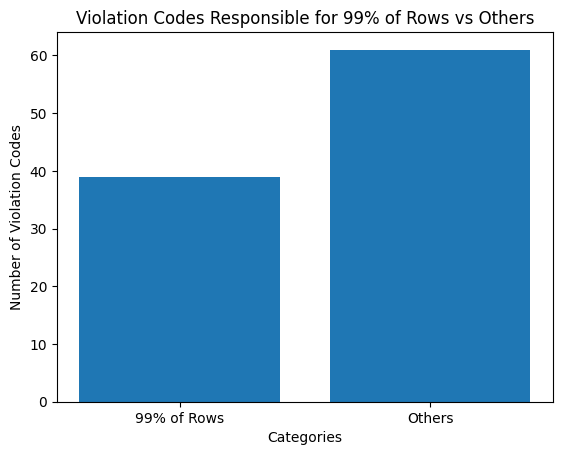

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of violation codes not responsible for 99% of the rows
num_distinct_codes_not_99_percent = df_cleaned.select("Violation Code").distinct().count() - num_distinct_codes_99_percent

# Data for the plot
categories = ['99% of Rows', 'Others']
values = [num_distinct_codes_99_percent, num_distinct_codes_not_99_percent]

# Create a bar plot
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Number of Violation Codes')
plt.title('Violation Codes Responsible for 99% of Rows vs Others')
plt.show()


In [ ]:
df_cleaned.printSchema()

root
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Color: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Violation County: string (nullable = true)



In [ ]:
from pyspark.sql.functions import to_date, year, month, dayofmonth, hour, when
from pyspark.sql.types import DateType


from pyspark.sql.functions import *


# Convert 'violation time' to hour of the day and time of day columns
df_cleaned = df_cleaned.withColumn('hour', hour(to_timestamp('Violation Time', 'hh:mm:ss a')))
df_cleaned = df_cleaned.withColumn('time_of_day',
                                   when(col('hour') < 12, 'morning')
                                   .when(col('hour') < 18, 'afternoon')
                                   .otherwise('evening'))


In [ ]:

df_cleaned.printSchema()

root
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Color: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Violation County: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- time_of_day: string (nullable = false)



In [ ]:
from pyspark.sql.functions import desc

# group the data by the Registration State column and count the number of occurrences of each state
state_counts = df_cleaned.groupBy('Registration State').count()

# sort the states by count in descending order
state_counts = state_counts.orderBy(desc('count'))

# show the 10 most common occurring states
state_counts.show(10)


+------------------+-------+
|Registration State|  count|
+------------------+-------+
|                NY|9690269|
|                NJ|1038511|
|                PA| 212764|
|                FL| 172425|
|                IN| 134961|
|                CT| 112745|
|                VA|  76982|
|                MA|  60092|
|                MD|  42916|
|                TX|  42171|
+------------------+-------+
only showing top 10 rows



In [ ]:
df_cleaned = df_cleaned.filter(df_cleaned['Registration State'] != '99')
df_cleaned = df_cleaned.filter(df_cleaned['Plate Type'] != '999')

In [ ]:
# Group by the Vehicle Color column and count the number of occurrences of each color
color_counts = df_cleaned.groupBy('Vehicle Color').count()

# Sort the counts in descending order and select the top 20 entries
top_colors = color_counts.orderBy('count', ascending=False).limit(40)

# Show the top 20 colors
top_colors.show()



+-------------+-------+
|Vehicle Color|  count|
+-------------+-------+
|           WH|2329444|
|           GY|2302708|
|           BK|2061138|
|        WHITE|1046560|
|           BL| 772815|
|           RD| 481911|
|        BLACK| 450786|
|         GREY| 298123|
|        BROWN| 291128|
|        SILVE| 185031|
|           GR| 182249|
|         BLUE| 171642|
|          RED| 155294|
|           TN| 120459|
|           BR| 100633|
|           YW|  98333|
|          BLK|  83638|
|        OTHER|  58786|
|        GREEN|  57052|
|           GL|  54814|
+-------------+-------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import regexp_replace, when


# Combine similar colors into one category
df_cleaned = df_cleaned.withColumn('Vehicle Color', when(df_cleaned['Vehicle Color'].isin(['SL', 'SILVR', 'SIL', 'SILVE','sl.']), 'silver')
                                 .otherwise(df_cleaned['Vehicle Color']))

# Bin "dark blue" and "dark green" into "blue" and "green", respectively
df_cleaned = df_cleaned.withColumn('Vehicle Color', when(df_cleaned['Vehicle Color'].isin(['dark blue', 'BL','blu']), 'blue')
                                 .when(df_cleaned['Vehicle Color'] == 'dark green', 'green')
                                 .when(df_cleaned['Vehicle Color'].isin(['blk', 'bl', 'bk','bk.','tn','bl.']), 'black')
                                 .when(df_cleaned['Vehicle Color'].isin(['WH','wt','wt.']), 'white')
                                 .when(df_cleaned['Vehicle Color'].isin(['GY', 'GR', 'GL','gy','GRY','gry','gray','GRAY','gy.']), 'grey')
                                 .when(df_cleaned['Vehicle Color'].isin(['whi','wh','wht','why','WH']), 'white')
                                 .when(df_cleaned['Vehicle Color'].isin(['YW']), 'yellow')
                                 .when(df_cleaned['Vehicle Color'].isin(['RD','rd']), 'red')
                                 .when(df_cleaned['Vehicle Color'].isin(['BR','br']), 'brown')
                                 .when(df_cleaned['Vehicle Color'].isin(['yello','yw']), 'yellow')
                                 .when(df_cleaned['Vehicle Color'].isin(['gr','GR','gl']), 'green')
                                 .when(df_cleaned['Vehicle Color'].isin(['or','mn','mr','orang']), 'orange')
                                 .otherwise(df_cleaned['Vehicle Color']))

# Convert all colors to lowercase for consistency
df_cleaned = df_cleaned.withColumn('Vehicle Color', lower(df_cleaned['Vehicle Color']))



In [ ]:
# Group by the Vehicle Color column and count the number of occurrences of each color
color_counts = df_cleaned.groupBy('Vehicle Color').count()

# Sort the counts in descending order and select the top 20 entries
top_colors = color_counts.orderBy('count', ascending=False).limit(5)

# Show the top 20 colors
top_colors.show()

+-------------+-------+
|Vehicle Color|  count|
+-------------+-------+
|        white|3376028|
|         grey|2918694|
|           bk|2061138|
|         blue| 944460|
|          red| 637214|
+-------------+-------+



In [ ]:
df_cleaned.printSchema()

root
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Color: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Violation County: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- time_of_day: string (nullable = false)



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession


In [ ]:
spark = SparkSession.builder \
    .appName("StringIndexer and OneHotEncoder Example") \
    .getOrCreate()


In [ ]:
# categorical_columns = ['Registration State', 'Plate Type', 'Issue Date', 'Vehicle Body Type', 'Vehicle Color', 'Violation Time', 'Violation County']

categorical_columns = ['Registration State', 'Plate Type', 'Issue Date', 'Vehicle Body Type', 'Vehicle Color']
# numerical_columns = ['Street Code1', 'Street Code2', 'Street Code3', 'Violation Precinct']
numerical_columns = ['Violation Precinct']
#i will not use them all

In [ ]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in categorical_columns]
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_onehot") for column in categorical_columns]


In [ ]:
assembler = VectorAssembler(inputCols=[column+"_onehot" for column in categorical_columns] + numerical_columns, outputCol="features")


In [ ]:
#i might use linear regression
pipeline = Pipeline(stages=indexers + encoders + [assembler])
model = pipeline.fit(df_cleaned)
# Transform the data using the pipeline #there is a problem with transformed data here i can replace it with jusy model and compbine the both steps model=pipeline.fit(df_cleaned).transform(df_cleaned)
transformed_data = model.transform(df_cleaned)

# Select 'features' and 'Violation_Code' columns from the transformed DataFrame
selected_columns = transformed_data.select("features", "Violation Code")

# # Show the first few rows of the selected columns
selected_columns.show()
transformed_data.show()


+--------------------+--------------+
|            features|Violation Code|
+--------------------+--------------+
|(4587,[1,66,1084,...|            16|
|(4587,[2,66,1232,...|            98|
|(4587,[1,66,1291,...|            20|
|(4587,[0,66,985,1...|            21|
|(4587,[2,66,1164,...|            14|
|(4587,[0,67,1265,...|            48|
|(4587,[0,66,1321,...|            14|
|(4587,[11,66,1169...|            98|
|(4587,[0,66,694,1...|            46|
|(4587,[0,66,694,1...|            24|
|(4587,[0,66,694,1...|            24|
|(4587,[12,66,762,...|            21|
|(4587,[0,66,762,1...|            74|
|(4587,[17,66,934,...|            14|
|(4587,[0,67,938,1...|            46|
|(4587,[0,67,940,1...|            71|
|(4587,[0,67,768,1...|            14|
|(4587,[4,66,768,1...|            19|
|(4587,[1,66,942,1...|            14|
|(4587,[0,66,945,1...|            21|
+--------------------+--------------+
only showing top 20 rows

+------------------+----------+--------------+----------------

In [ ]:
train_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=42)
#train_data, test_data = model.randomSplit([0.8, 0.2], seed=42)


In [ ]:
from pyspark.ml.classification import LogisticRegression

#logr = LogisticRegression(family="multinomial", featuresCol="features", labelCol="Violation Code")
logr = LogisticRegression(featuresCol="features", labelCol="Violation Code")
logr_Model = logr.fit(train_data)


In [ ]:
predictions = logr_Model.transform(test_data)



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Evaluator= MulticlassClassificationEvaluator(labelCol="Violation Code", predictionCol="prediction")
#calculate accuracy
accuracy= Evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.42017352367663924
